In [140]:
import gym
from IPython import display
import numpy as np
import pandas as pd
from collections import namedtuple
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
%matplotlib inline

In [141]:
env = gym.make('Blackjack-v0')
discount = 1

In [142]:
def sample_policy(state):
    
    score,dealer_card,ace = state
    
    return 0 if score>=19 else 1

In [143]:
def get_trajectory(policy,env):
    
    trajectory = []
    state = env.reset()
    
    
    while True:
        
        action = sample_policy(state)
        next_state,reward,done,_ = env.step(action)
        trajectory.append((next_state,action,reward))
        
        state = next_state
        
        if done:
            break
            
            
            
    return trajectory

In [146]:
def MC_prediction(env,policy,iters=10):
    
    value_table = defaultdict(float)
    N = defaultdict(float)
    
    for eps in range(iters):
        
        returns = 0
        old_states = []
        
        tra = get_trajectory(policy,env)
        
        states,_,rewards = zip(*tra)
        
        for t in range(len(states)-1,-1,-1):
            
            S = states[t]
            R = rewards[t]
            returns += R
            
            
            if S not in old_states:
                
                N[S] += 1
                value_table[S] += (returns - value_table[S])/N[S]
                old_states.append(S)
                
    return value_table

In [174]:
value = MC_prediction(env,sample_policy,iters=500000)

In [175]:
def plot_value_function(V, title = "Value Function"):
    '''
    Plots the value function as a surface plot.
    '''
    min_x = 11 # min(k[0] for k in V.keys())
    max_x = 20
    min_y = min(k[1] for k in V.keys())
    max_y = max(k[1] for k in V.keys())

    x_range = np.arange(min_x, max_x + 1)
    y_range = np.arange(min_y, max_y + 1)
    X, Y = np.meshgrid(x_range, y_range)

    # Find value for all (x, y) coordinates
    Z_noace = np.apply_along_axis(lambda _: V[(_[0], _[1], False)], 2, np.dstack([X, Y]))
    Z_ace = np.apply_along_axis(lambda _: V[(_[0], _[1], True)], 2, np.dstack([X, Y]))

    def plot_surface(X, Y, Z, title):
        fig = plt.figure(figsize = (20, 10))
        ax = fig.add_subplot(111, projection = '3d')
        surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1,
                               cmap = matplotlib.cm.coolwarm, vmin = -1.0, vmax = 1.0)
        ax.set_xlabel('Player Sum')
        ax.set_ylabel('Dealer Showing')
        ax.set_zlabel('Value')
        ax.set_title(title)
        ax.view_init(ax.elev, -120)
        fig.colorbar(surf)
        plt.show()

    plot_surface(X, Y, Z_noace, "{} (No Usable Ace)".format(title))
    plot_surface(X, Y, Z_ace, "{} (Usable Ace)".format(title))

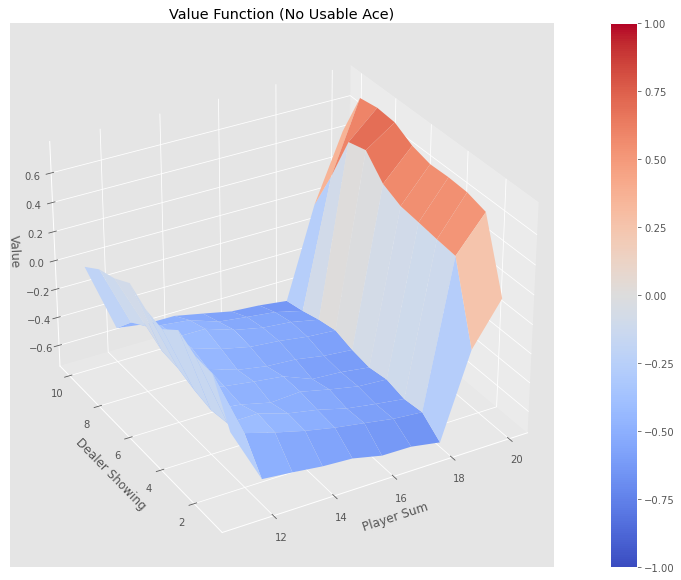

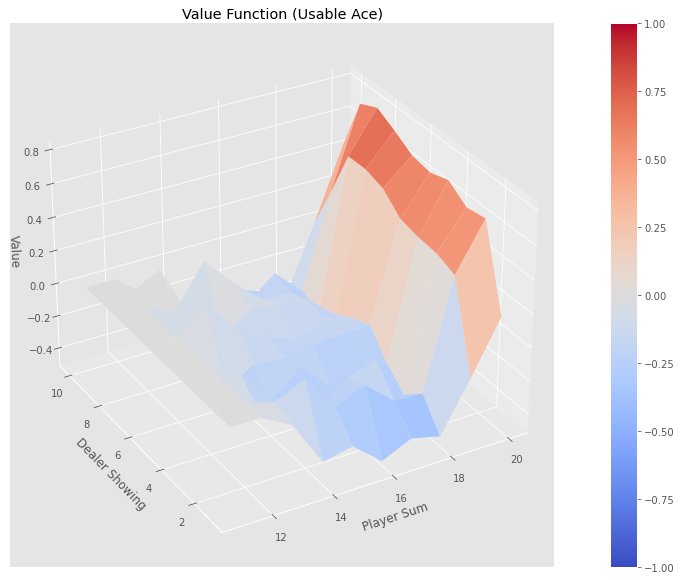

In [176]:
plot_value_function(value)